In [13]:
import os, pathlib
os.chdir("/Users/gregcc/Documents/GitHub/SURP25/Microlensing")

In [14]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from ML import TwoLens1S
from ML import ThreeLens1S

# Parameters

In [15]:
#parameters from Liebig, et al; (2010)
q2 = 1e-3
q3 = 1e-5
s2 = 1.3
s3 = 1.3003845585056752
psi = 1.393457227228705
q4 = q3 + q2 #for binary system
u0_list =[-0.035] #paper

t0 = 0
tE = 20
rho = 0.0018
rs = rho

secnum = 45
basenum = 2
num_points = 1000

In [16]:
#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

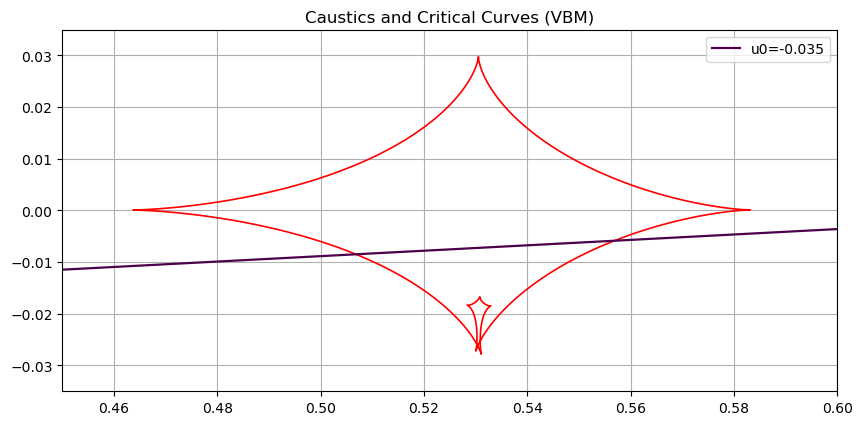

In [17]:
triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

In [18]:
#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

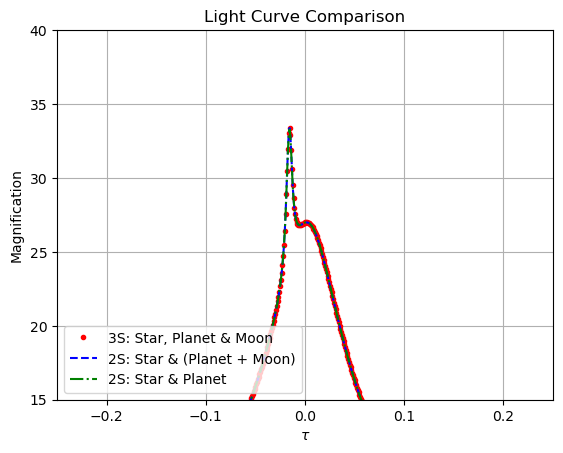

In [23]:
#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.25, .25)
plt.ylim(15, 40)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

In [20]:
#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

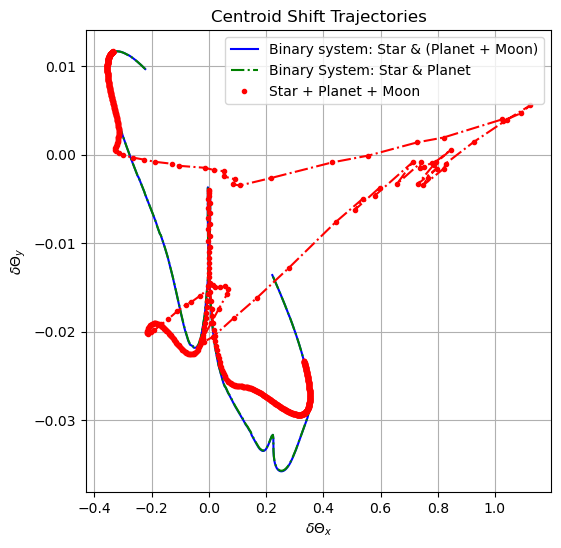

In [22]:
#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

# Changing Mass

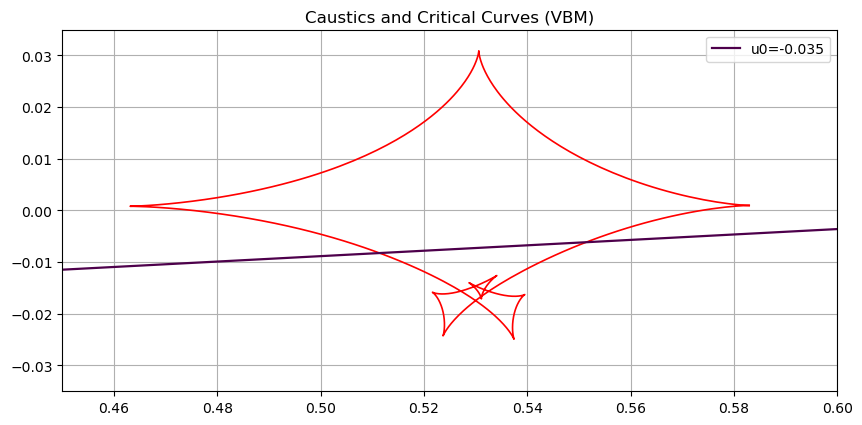

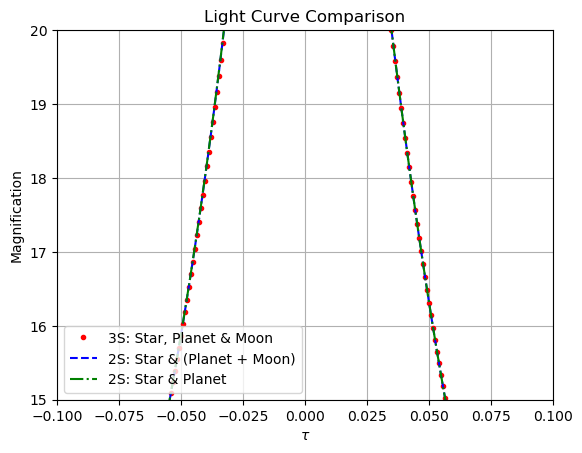

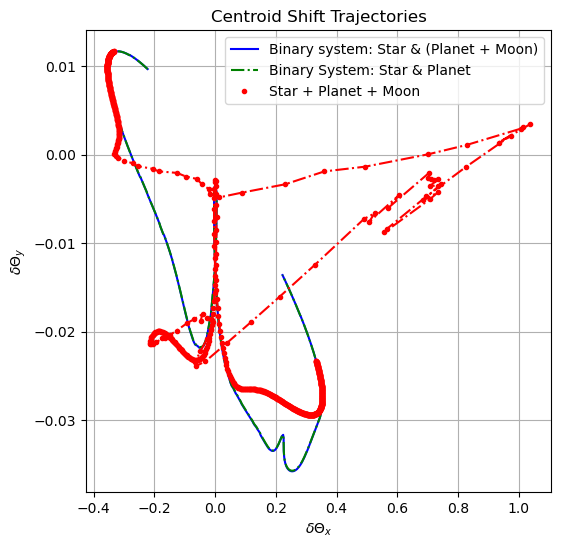

In [24]:
q3 = 1e-4

#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(15, 20)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

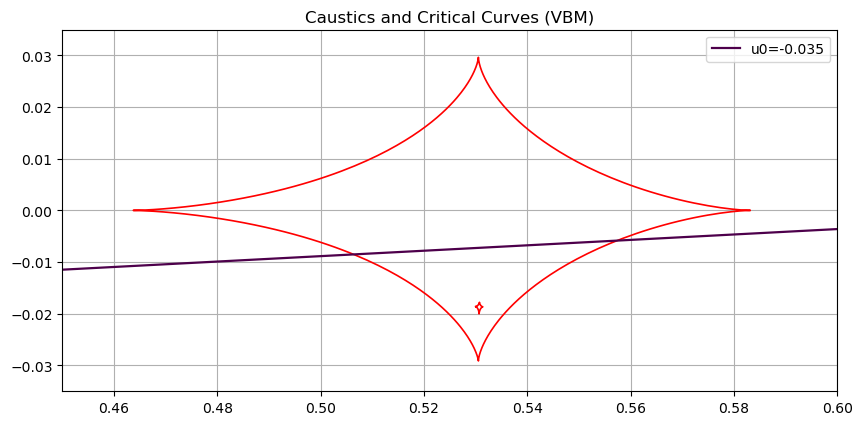

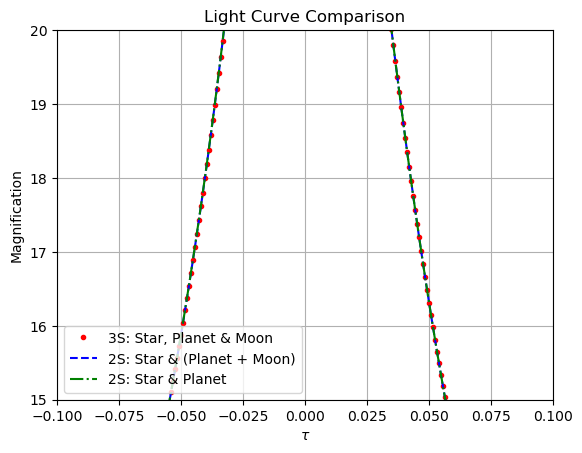

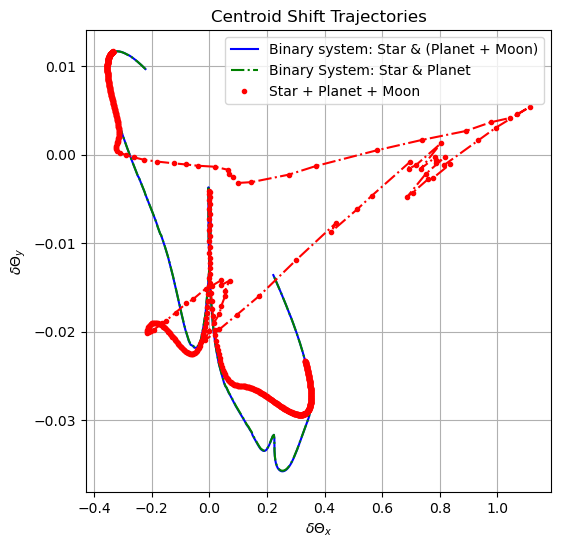

In [25]:
q3 = 1e-6

#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(15, 20)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()